In [1]:
import csv
import sys
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib
import datetime
import ipywidgets as widgets
from IPython.display import Image, display, HTML
from ipywidgets import interact, interact_manual


%matplotlib inline

In [2]:
# Q1 Minimum Core Tasks

In [3]:
csv_url = 'https://health-infobase.canada.ca/src/data/covidLive/covid19.csv'
req = requests.get(csv_url)
url_content = req.content
csv_file = open('covid19.csv', 'wb')

csv_file.write(url_content)
csv_file.close()
#with open('covid19.csv', newline='') as f:
#    reader=csv.reader(f)
#    for row in reader:
#        print(row)

In [4]:
with open("covid19.csv","r") as file:
    data=list(csv.reader(file))
#for row in data:
#    print(row[3])

In [5]:
# Q2 Minimum Core Tasks

In [6]:
#data #first column province code, second column province name, 

In [7]:
#data_pr=['10','11','12','13','24','35','46','47','48','59','60','61','62'] #all province codes 


def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

data_pr=Remove(row[0] for row in data)
names_pr=Remove(row[1] for row in data)


prev_date=data[1][3]


#rewrite dates as numbers -> for plotting (from 0 to ..)
        


In [8]:
prev_date

'31-01-2020'

In [9]:
print(data_pr)

['pruid', '35', '59', '1', '24', '48', '47', '46', '13', '10', '12', '11', '61', '62', '60', '99']


In [10]:
print(names_pr)

['prname', 'Ontario', 'British Columbia', 'Canada', 'Quebec', 'Alberta', 'Saskatchewan', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Prince Edward Island', 'Northwest Territories', 'Nunavut', 'Yukon', 'Repatriated travellers']


In [11]:
del data_pr[0]
del names_pr[0]

In [12]:
num_row=-1
data[1][3]=1
index=1 #index of date: start from 1 ..r eventually will just go o]up by 1 each time
for row in data: #for each row
    num_row=num_row+1 #starts at 0 -> represents row number
    if num_row<2:
        continue #goes back to for loop for row 0 and row 1 (already established)
    date=row[3]
    if int(date[0:2])>= 11 and int(date[3:5])>= 3:  #date just going up by 1 (after march 11th )
        change=int(date[0:2])-int(prev_date[0:2]) 
        if change!=0: #if it changes at all 
            index=index+1 #increase date index by 1
    else:
        change=int(date[0:2])-int(prev_date[0:2]) 
        if change<0:# goign up by a month
            if int(date[3:5])==2:
                change=8 #only once -> jan 31st to feb 8th
            else:
                change=1
        index=index+change #difference between dates
    
    prev_date=date
    row[3]=index #change date 
        
        

In [13]:
#for row in data:
#    print(row[3])

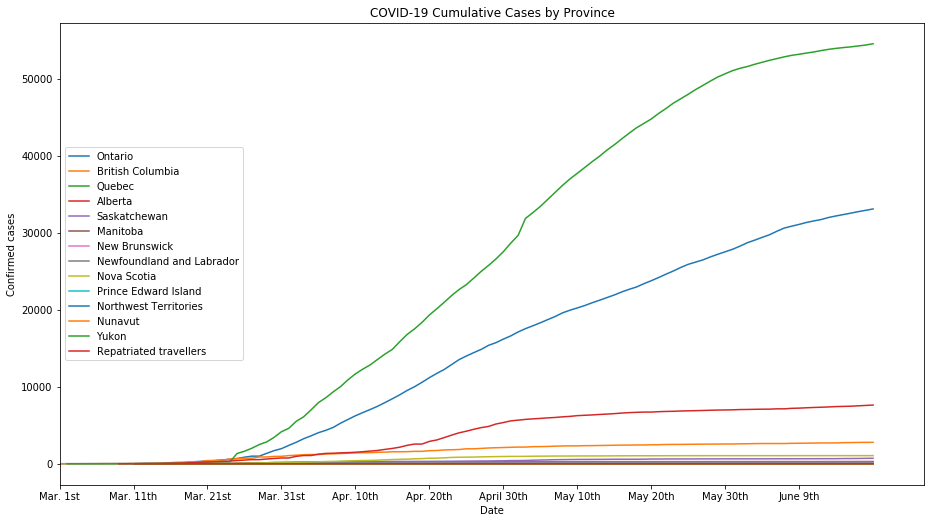

In [14]:
fig=plt.figure()
fig.set_size_inches(15.5, 8.5)
for i in range(len(data_pr)): #for each provincial code
    if data_pr[i]=='1':
        continue
    x_vec=[] #x axis 
    y_vec=[] #y axis
    for row in data: #for each data row
       # num_row=num_row+1
       # if num_row==0:
       #     continue
        if row[0]==data_pr[i]:
            x_vec.append(row[3]) #append date
            y_vec.append(int(row[4]))
    plt.plot(x_vec,y_vec, label=names_pr[i]) #start at March 1st
plt.xlim(left=30)
#plt.xticks([0,20,40,60,80,100,120], ('Jan. 31st', 'Feb. 20th', 'Mar. 11th', 'Mar. 31st', 'Apr. 20th', 'May 10th','May 30th'))
plt.xticks([30,40,50,60,70,80,90,100,110,120,130], ('Mar. 1st', 'Mar. 11th', 'Mar. 21st', 'Mar. 31st','Apr. 10th', 'Apr. 20th','April 30th', 'May 10th','May 20th','May 30th','June 9th'))
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.title('COVID-19 Cumulative Cases by Province')
plt.legend(loc='center left') #bbox_to_anchor=(1, 0.5))
fig.savefig('Q2.png', bbox_inches='tight')
# Pandas
#df.myCol.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend()        
        
    

In [15]:
#data_pr

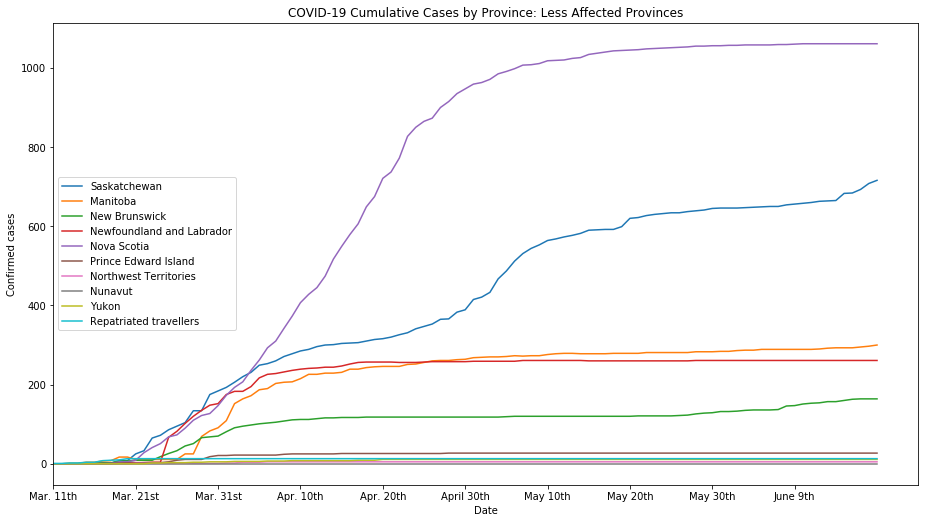

In [16]:
fig=plt.figure()
fig.set_size_inches(15.5, 8.5)
for i in range(len(data_pr)): #for each provincial code
    if data_pr[i]=='1'  or data_pr[i]=='35' or data_pr[i]=='59' or data_pr[i]=='24' or data_pr[i]=='48':#remove data for canada, alberta, BC
        continue
    x_vec=[] #x axis 
    y_vec=[] #y axis
    for row in data: 
        if row[0]==data_pr[i]: #if data is for that province
            x_vec.append(row[3]) #append date
            y_vec.append(int(row[4])) #append cases
    plt.plot(x_vec,y_vec, label=names_pr[i])

plt.xlim(left=40)
#plt.xticks([0,20,40,60,80,100,120], ('Jan. 31st', 'Feb. 20th', 'Mar. 11th', 'Mar. 31st', 'Apr. 20th', 'May 10th','May 30th'))
plt.xticks([40,50,60,70,80,90,100,110,120,130], ('Mar. 11th', 'Mar. 21st', 'Mar. 31st','Apr. 10th', 'Apr. 20th','April 30th', 'May 10th','May 20th','May 30th','June 9th'))       

#plt.xticks([0,20,40,60,80,100,120], ('Jan. 31st', 'Feb. 20th', 'Mar. 11th', 'Mar. 31st', 'Apr. 20th', 'May 10th','May 30th'))
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.title('COVID-19 Cumulative Cases by Province: Less Affected Provinces')
plt.legend(loc='center left') #bbox_to_anchor=(1, 0.5))
fig.savefig('Q2lesserprovs.png', bbox_inches='tight')
# Pandas
#df.myCol.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend()        
        

In [17]:
# Q3 Minimum Core Tasks

In [18]:
# Q4 Minimum Core Tasks

In [19]:
covid_df = pd.read_csv('covid19.csv',header=0, parse_dates=['date'], dayfirst=True)
Q4_cols = ['pruid','prnameFR','numconf','numprob','numdeaths','numtotal','numtested','numrecover','percentrecover','ratetested','ratetotal','ratedeaths','deathstoday','percentdeath','testedtoday','recoveredtoday','percentactive','percentoday']
covid_df.drop(Q4_cols, axis = 1, inplace = True)
covid_df['Cut Off Date'] = '2020-03-23'
covid_df['Cut Off Date'] = pd.to_datetime(covid_df['Cut Off Date']).dt.date
covid_df['date'] = pd.to_datetime(covid_df['date']).dt.date
covid_df = covid_df[covid_df['date'] >= covid_df['Cut Off Date']]
#covid_df

In [20]:
alb_df = covid_df[covid_df.prname == 'Alberta'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
bc_df = covid_df[covid_df.prname == 'British Columbia'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
mani_df = covid_df[covid_df.prname == 'Manitoba'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
nb_df = covid_df[covid_df.prname == 'New Brunswick'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
nl_df = covid_df[covid_df.prname == 'Newfoundland and Labrador'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
nt_df = covid_df[covid_df.prname == 'Northwest Territories'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
ns_df = covid_df[covid_df.prname == 'Nova Scotia'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
nun_df = covid_df[covid_df.prname == 'Nunavut'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
on_df = covid_df[covid_df.prname == 'Ontario'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
pei_df = covid_df[covid_df.prname == 'Prince Edward Island'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
qb_df = covid_df[covid_df.prname == 'Quebec'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
sk_df = covid_df[covid_df.prname == 'Saskatchewan'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
yk_df = covid_df[covid_df.prname == 'Yukon'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)

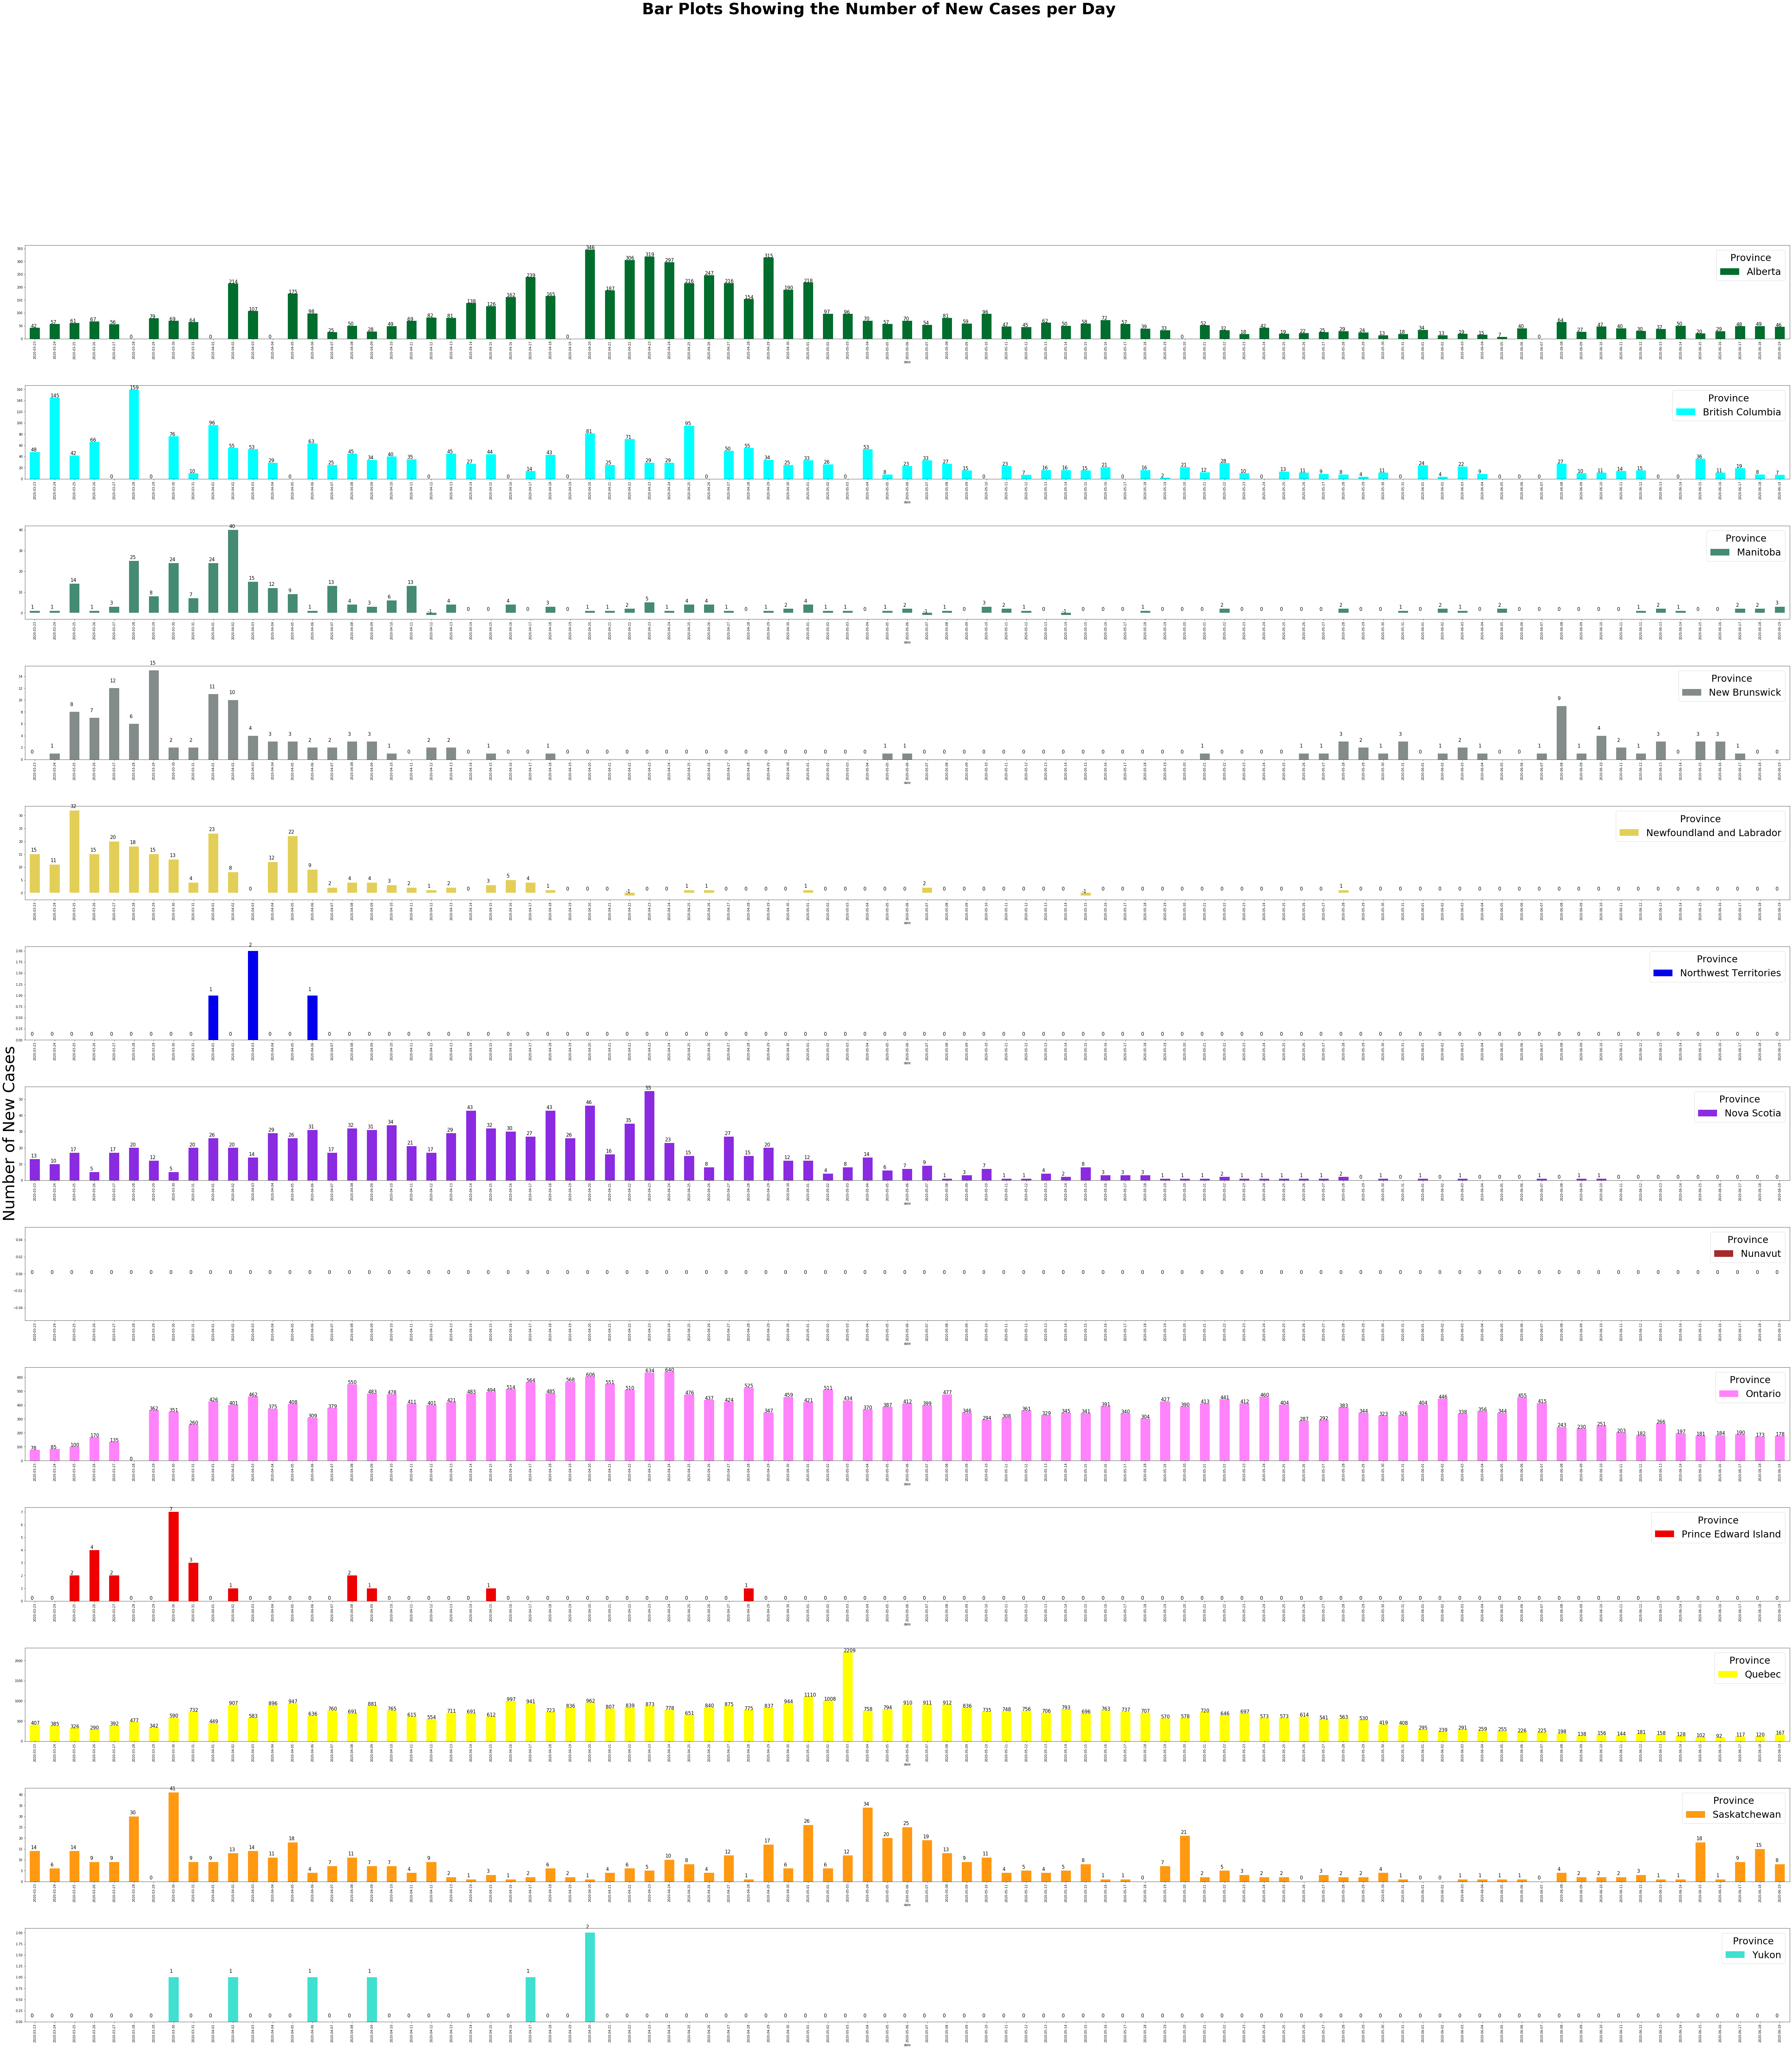

In [21]:
colors = ["#006D2C", "#00FFFF","#458B74","#838B8B","#E3CF57","#0000EE","#8A2BE2","#A52A2A","#FF83FA","#EE0000","#FFFF00","#FF9912","#40E0D0"]
fig = plt.figure()
fig.set_size_inches(100, 100)
ax1 = fig.add_subplot(13,1,1)
ax2 = fig.add_subplot(13,1,2)
ax3 = fig.add_subplot(13,1,3)
ax4 = fig.add_subplot(13,1,4)
ax5 = fig.add_subplot(13,1,5)
ax6 = fig.add_subplot(13,1,6)
ax7 = fig.add_subplot(13,1,7)
ax8 = fig.add_subplot(13,1,8)
ax9 = fig.add_subplot(13,1,9)
ax10 = fig.add_subplot(13,1,10)
ax11 = fig.add_subplot(13,1,11)
ax12 = fig.add_subplot(13,1,12)
ax13 = fig.add_subplot(13,1,13)


alb_df.plot.bar(ax = ax1,grid = False,color = colors[0])
bc_df.plot.bar(ax = ax2,grid = False,color = colors[1])
mani_df.plot.bar(ax = ax3,grid = False,color = colors[2])
nb_df.plot.bar(ax = ax4,grid = False,color = colors[3])
nl_df.plot.bar(ax = ax5,grid = False,color = colors[4])
nt_df.plot.bar(ax = ax6,grid = False,color = colors[5])
ns_df.plot.bar(ax = ax7,grid = False,color = colors[6])
nun_df.plot.bar(ax = ax8,grid = False,color = colors[7])
on_df.plot.bar(ax = ax9,grid = False,color = colors[8])
pei_df.plot.bar(ax = ax10,grid = False,color = colors[9])
qb_df.plot.bar(ax = ax11,grid = False,color = colors[10])
sk_df.plot.bar(ax = ax12,grid = False,color = colors[11])
yk_df.plot.bar(ax = ax13,grid = False,color = colors[12])

for a in ax1.patches:
    ax1.text(a.get_x()+.04, a.get_height()+1, \
            str(round((a.get_height()), 2)), fontsize=15, color='black', rotation=0)
for b in ax2.patches:
    ax2.text(b.get_x()+.04, b.get_height()+1, \
            str(round((b.get_height()), 2)), fontsize=15, color='black', rotation=0)
for c in ax3.patches:
    ax3.text(c.get_x()+.04, c.get_height()+1, \
            str(round((c.get_height()), 2)), fontsize=15, color='black', rotation=0)
for d in ax4.patches:
    ax4.text(d.get_x()+.04, d.get_height()+1, \
            str(round((d.get_height()), 2)), fontsize=15, color='black', rotation=0)
for e in ax5.patches:
    ax5.text(e.get_x()+.04, e.get_height()+1, \
            str(round((e.get_height()), 2)), fontsize=15, color='black', rotation=0)
for f in ax6.patches:
    ax6.text(f.get_x()+.04, f.get_height()+0.1, \
            str(round((f.get_height()), 2)), fontsize=15, color='black', rotation=0)
for g in ax7.patches:
    ax7.text(g.get_x()+.04, g.get_height()+1, \
            str(round((g.get_height()), 2)), fontsize=15, color='black', rotation=0)
for h in ax8.patches:
    ax8.text(h.get_x()+.04, h.get_height(), \
            str(round((h.get_height()), 2)), fontsize=15, color='black', rotation=0)
for i in ax9.patches:
    ax9.text(i.get_x()+.04, i.get_height()+1, \
            str(round((i.get_height()), 2)), fontsize=15, color='black', rotation=0)
for j in ax10.patches:
    ax10.text(j.get_x()+.04, j.get_height()+0.1, \
            str(round((j.get_height()), 2)), fontsize=15, color='black', rotation=0)
for k in ax11.patches:
    ax11.text(k.get_x()+.04, k.get_height()+1, \
            str(round((k.get_height()), 2)), fontsize=15, color='black', rotation=0)
for l in ax12.patches:
    ax12.text(l.get_x()+.04, l.get_height()+1, \
            str(round((l.get_height()), 2)), fontsize=15, color='black', rotation=0)
for m in ax13.patches:
    ax13.text(m.get_x()+.04, m.get_height()+0.1, \
            str(round((m.get_height()), 2)), fontsize=15, color='black', rotation=0)
fig.suptitle('Bar Plots Showing the Number of New Cases per Day',fontsize = 50, fontweight = 'bold', va = 'bottom')

ax1.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax2.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax3.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax4.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax5.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax6.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax7.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax8.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax9.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax10.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax11.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax12.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax13.legend(fontsize = 30, title = 'Province', title_fontsize=30 )

ax7.set_ylabel('Number of New Cases',fontsize = 50)
plt.subplots_adjust(bottom=0.1, hspace=0.5)
plt.savefig('Q4.png', bbox_inches='tight')

In [22]:
# Q5 Minimum Core Tasks

In [23]:
# Q6 Minimum Core Tasks

In [24]:
# Free Choice Tasks

In [25]:
df_covid = pd.read_csv('covid19.csv',header=0, parse_dates=['date'], dayfirst=True)
fct_cols = ['prnameFR','pruid','percentoday','percentrecover','ratetested','ratetotal','ratedeaths','deathstoday','percentdeath','percentactive']
df_covid.drop(fct_cols, axis = 1, inplace = True)
df_covid['date'] = pd.to_datetime(df_covid['date']).dt.date
df_covid = df_covid[df_covid.prname != 'Canada'] 
df_covid = df_covid[df_covid.prname != 'Repatriated travellers']
freechoice_df = df_covid.rename(columns = {"prname":"Province","numconf":"No. of Confirmed Cases","date":"Date","numprob":"No. of Probable Cases","numdeaths":"No. of Deaths","numtotal":"Total No. of Cases","numtested":"No. of People Tested","numrecover":"No. of People Recovered","numtoday":"No. of Cases Per Day","testedtoday":"No. of People Tested Per Day","recoveredtoday":"No. of People Recovered Per Day"})
freechoice_df = freechoice_df.set_index('Date')
freechoice_df = freechoice_df.fillna(0)
freechoice_df['No. of Deaths'] = freechoice_df['No. of Deaths'].astype('int64')
freechoice_df['No. of People Tested'] = freechoice_df['No. of People Tested'].astype('int64')
freechoice_df['No. of People Recovered'] = freechoice_df['No. of People Recovered'].astype('int64')
freechoice_df['No. of People Tested Per Day'] = freechoice_df['No. of People Tested Per Day'].astype('int64')
freechoice_df['No. of People Recovered Per Day'] = freechoice_df['No. of People Recovered Per Day'].astype('int64')
#freechoice_df

In [28]:
column= widgets.Dropdown(options=list(freechoice_df.select_dtypes('number').columns),description='Y - axis')
date1 = widgets.DatePicker(value=freechoice_df.index.min(),description='From')
date2 = widgets.DatePicker(value=freechoice_df.index.max(),description='To')


ui = widgets.HBox([column, date1, date2])
def plot_up_to(column, date1,date2):
    fig = plt.figure()
    fig.set_size_inches(20, 10)
    From_date = pd.Timestamp(date1)
    To_date = pd.Timestamp(date2)
    plot_df = freechoice_df.loc[(freechoice_df.index >= From_date) & (freechoice_df.index <= To_date)]
    plot_df = plot_df.groupby('Province')
    plot_df[column].plot(marker = '.',legend = 'reverse',fontsize = 10) 
    plt.title('Interactive Plot Showing the Use of Widgets', fontsize = 30, color = 'blue')
    plt.ylabel(column,fontsize = 30, color = 'blue')
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize = 30, color = 'blue') 
    plt.savefig('FT.jpg', bbox_inches='tight')

out = widgets.interactive_output(plot_up_to, {'column': column, 'date1': date1, 'date2': date2})

display(ui, out)

Output()